# Определение перспективного тарифа для телеком компании.

Задача - выбрать оптимальный тариф для сотового оператора из представленных:

### Тариф «Смарт»

Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

### Тариф «Ультра»

Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей
Обратите внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

## Изучаем датасет, формируем общее представление о данных, подключаем необходимые бибилиотеки
<br>

### Подключаем библиотеки и загружаем исходные датасеты, приводим данные к нужным типам, проводим поиск ошибок
<br>
Подключаем для последующего использования в проекте необходимые бибилиотеки (Pandas, Numpy и пр.) 

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp 
from scipy import stats as st

pd.options.display.max_columns = None

Для последующего использования открываем исходные данные, они представлены набором таблиц, приведем ошибочные данные к нужным типам.

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

Изучим загруженные данные по датасетам :
<br>

#### Информация о звонках:

In [3]:
print('Датасет информации о звонках:')
calls.info()
calls.sample(10)

Датасет информации о звонках:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
20210,1054_543,2018-10-04,0.00,1054
82907,1207_54,2018-09-29,12.26,1207
103493,1265_155,2018-08-18,15.89,1265
36415,1092_71,2018-06-26,0.00,1092
61691,1155_499,2018-11-04,12.42,1155
11228,1029_117,2018-11-10,1.84,1029
56967,1144_338,2018-07-14,6.40,1144
87322,1219_91,2018-06-05,13.04,1219
103436,1265_98,2018-07-22,12.47,1265
182669,1454_421,2018-06-20,4.80,1454


Как видно из загруженной общей информации о датасете столбец call_date - имеет тип object, переведем его в формат datetime:

In [4]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


#### Информация об использовании интернета:
<br>


In [5]:
print('Датасет информации о интернете:')
internet.info()
internet.sample(10)

Датасет информации о интернете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
14384,14384,1050_211,1006.49,2018-09-07,1050
59153,59153,1199_112,122.97,2018-11-22,1199
28647,28647,1100_13,470.27,2018-07-03,1100
146786,146786,1491_58,533.37,2018-08-07,1491
103615,103615,1350_77,462.85,2018-12-01,1350
106497,106497,1360_117,752.99,2018-06-30,1360
15079,15079,1054_59,5.57,2018-07-10,1054
25711,25711,1089_3,1290.39,2018-04-05,1089
14042,14042,1049_26,629.35,2018-09-20,1049
5875,5875,1017_315,946.61,2018-08-17,1017


Как видно из загруженной общей информации о датасете столбец session_date - имеет тип object, переведем его в формат datetime, также столбец id имеет тип object, переведм его в int:

In [6]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
internet['id'] = internet['id'].astype('int')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null int64
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 5.7 MB


#### Информация о сообщениях:
<br>


In [7]:
print('Датасет информации о сообщениях:')
messages.info()
messages.sample(10)

Датасет информации о сообщениях:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
77584,1327_81,2018-09-21,1327
51850,1231_471,2018-07-03,1231
79712,1333_68,2018-10-06,1333
11528,1048_174,2018-10-02,1048
2162,1005_24,2018-03-10,1005
65132,1281_19,2018-08-16,1281
925,1003_359,2018-10-12,1003
62258,1273_116,2018-08-15,1273
108704,1436_198,2018-05-26,1436
57889,1253_398,2018-08-18,1253


Как видно из загруженной общей информации о датасете столбец message_date - имеет тип object, переведем его в формат datetime, также переведем в тип int, значение столбца id:

In [8]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
messages['id'] = messages['id'].astype('int')
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null int64
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 MB


#### Информация о тарифах:
<br>

In [9]:
print('Датасет информации о тарифах:')
tariffs.info(10)
tariffs.head()

Датасет информации о тарифах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


#### Информация о пользователях:
<br>

In [10]:
print('Датасет информации о пользователях:')
users.info()
users.sample(10)

Датасет информации о пользователях:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
384,1384,42,NaN,Нижний Новгород,Кристина,Касьянова,2018-04-27,smart
166,1166,48,NaN,Нижний Новгород,Святослав,Жданов,2018-08-17,ultra
300,1300,40,NaN,Москва,Тихон,Азерников,2018-07-26,ultra
356,1356,75,NaN,Москва,Евгений,Гончаров,2018-04-18,ultra
32,1032,31,NaN,Ульяновск,Инна,Игнатьева,2018-01-04,smart
458,1458,36,NaN,Барнаул,Роберт,Азаров,2018-02-13,ultra
293,1293,39,2018-11-22,Санкт-Петербург,Эдита,Дубинина,2018-09-05,smart
163,1163,21,2018-12-16,Москва,Лев,Вишневский,2018-11-03,smart
291,1291,73,NaN,Москва,Мануэла,Анищенко,2018-02-08,smart
494,1494,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart


Как видно из загруженной общей информации о датасете столбцы churn_date и reg_date - имеют тип object, переведем их в формат datetime:

In [11]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Переведем все столбцы с типами object в нижний регистр для исключения дубликатов:

In [12]:
users = users.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)

users.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
403,1403,18,NaT,брянск,ахмет,амелин,2018-05-20,ultra
281,1281,62,NaT,нижний новгород,сара,зимина,2018-06-09,ultra
185,1185,26,NaT,санкт-петербург,мануэла,родина,2018-04-13,ultra
116,1116,65,NaT,петрозаводск,альберта,шевцова,2018-04-17,smart
344,1344,60,NaT,воронеж,илзе,игнатьева,2018-04-03,ultra
215,1215,55,NaT,рязань,руслан,алиев,2018-08-12,smart
105,1105,51,NaT,улан-удэ,рузана,рыбакова,2018-09-29,smart
203,1203,39,NaT,москва,владимир,григорьев,2018-03-13,ultra
386,1386,21,NaT,новосибирск,фаддей,родионов,2018-08-13,smart
72,1072,49,NaT,уфа,андрей,андрейкин,2018-02-20,smart


#### Вывод:
<br>

Мы прочитали и вывели на экран исходные данные, перевели в нужные типы значения столбцов, переименовали столбцы, перевели данные в нижний регистр. Обрабатывать нулевые значения мы не стали, так как при звонках нулевые значения длительности звонка означает, что звонок был пропущен, в таблице интернета нулевые значения количества использованных мегабайт означают, что человек в одну сессию использовал менее 1 мегабайта трафика. Таким образом, заполнение или удаление нулевых значений нецелесообразно, так как это приведет к искажению датасета. 
<br>

Вообще, в этом проекте исходные данные намного чище нежели в предыдущих.  

## Рассчитываем данные, необходимые  для дальнейшего анализа.
<br>

#### Рассчитаем количество звонков для каждого пользователя по месяцам:
<br>


In [13]:
# Переводим столбец в формат даты и времени
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
# Создаем столбец с месяцами
calls['month']= calls.loc[:,'call_date'].dt.month
# Округляем в большую сторону значения столбца duration
calls['duration'] = np.ceil(calls['duration'])
# Группируем звонки по месяцам и user_id, выводим сумму минут в месяц
calls_gr = calls.groupby(['user_id', 'month'])['duration'].sum()
# Сбрасываем индекс по столбцу 'месяц'
calls_gr = calls_gr.reset_index(level = 'month')
# Объеденяем полученную таблицу с таблицей пользователей по user_id
users_calls = users.merge(calls_gr, on='user_id', how = 'outer')
# Объеденяем полученную таблицу с таблицей Тарифы
users_calls = users_calls.merge(tariffs, left_on='tariff', right_on ='tariff_name')
users_calls.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,duration,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,5.0,159.0,1000,30720,3000,1950,150,1,1,ultra
1,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,6.0,172.0,1000,30720,3000,1950,150,1,1,ultra
2,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,7.0,340.0,1000,30720,3000,1950,150,1,1,ultra
3,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,8.0,408.0,1000,30720,3000,1950,150,1,1,ultra
4,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,9.0,466.0,1000,30720,3000,1950,150,1,1,ultra


Как мы видим, объеденение таблицы прошло успешно. Теперь осталось присоеденить к полученной таблице данные по сообщениям и объему интернет - трафика.

#### Рассчитаем количество сообщений для каждого пользователя по месяцам:
<br>
Сначала добавим в датасет messages(сообщения) столбец со значением месяца отправки сообщения, затем сгруппируем таблицу по значениям столбца user_id и month, после этого присоеденим полученную таблицу к полученной выше users_calls:

In [14]:
# Создаем столбец со значением месяца
messages['month'] = messages['message_date'].dt.month
# Группируем датафрейм по user_id и месяцам
message_gr = messages.groupby(['user_id', 'month'])['id'].count()
# Сбрасываем индекс месяца в итоговом датафрейме
message_gr = message_gr.reset_index(level = 'month')
# Объеденяем полученную таблицу с таблицей users_calls
users_calls_mesg = users_calls.merge(message_gr, on = ['user_id', 'month'], how = 'outer')

users_calls_mesg.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,duration,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,id
0,1000,52.0,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,5.0,159.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,22.0
1,1000,52.0,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,6.0,172.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,60.0
2,1000,52.0,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,7.0,340.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,75.0
3,1000,52.0,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,8.0,408.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,81.0
4,1000,52.0,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,9.0,466.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,57.0
5,1000,52.0,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,10.0,350.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,73.0
6,1000,52.0,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,11.0,338.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,58.0
7,1000,52.0,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,12.0,333.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,70.0
8,1003,23.0,NaT,москва,белла,белякова,2018-08-17,ultra,8.0,380.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,37.0
9,1003,23.0,NaT,москва,белла,белякова,2018-08-17,ultra,9.0,961.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,ultra,91.0


#### Рассчитаем объем интернет трафика для каждого пользователя по месяцам:
<br>
Теперь добавим в датасет internet(интернет) столбец со значением месяца использования интрнет-трафика, затем сгруппируем таблицу по значениям столбца user_id и month, присоеденим полученную таблицу к полученной выше, выведем первые пять строк итогового датафрейма:

In [15]:
# Создаем столбец с месяцем получения услуги
internet['month'] = internet['session_date'].dt.month
# Группируем значения по значениям столбцов user_id и month
internet_gr = internet.groupby(['user_id','month'])['mb_used'].sum()
# Сбросим индекс по месяцам в полученном датафрейме для дальнейшего объеденения 
internet_gr = internet_gr.reset_index(level = 'month')

users_final = users_calls_mesg.merge(internet_gr, on = ['user_id', 'month'], how = 'outer')

users_final = users_final.rename(columns = {'id': 'sms_count'})

users_final = users_final.fillna(0) #Заменим пропущенные значения на 0 в итоговой таблице

users_final.tail(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,duration,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,sms_count,mb_used
3212,1473,0.0,0,0,0,0,0,0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,19.0,17289.85
3213,1473,0.0,0,0,0,0,0,0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,20.0,13688.65
3214,1473,0.0,0,0,0,0,0,0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,14.0,21673.80
3215,1473,0.0,0,0,0,0,0,0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,20.0,18418.26
3216,1489,0.0,0,0,0,0,0,0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,17.0,11050.56
3217,1489,0.0,0,0,0,0,0,0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,32.0,17206.30
3218,1489,0.0,0,0,0,0,0,0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,21.0,19559.44
3219,1489,0.0,0,0,0,0,0,0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,20.0,17491.56
3220,1489,0.0,0,0,0,0,0,0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,35.0,17322.51
3221,1476,0.0,0,0,0,0,0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,530.78


#### Рассчитаем помесячную выручку с каждого пользователя по месяцам:
<br>
Дя этого создадим последовательно три столбца с минутами, сообщениями и объемом потребленного трафика сверх включенного в абонентскую плату. 

Посчитаем и добавим новые столбцы в датафрейм users_final:


In [16]:
# Посчитаем количество минутсверх лимита:
users_final['over_calls'] = (users_final['duration'] 
                             - users_final['minutes_included']).apply(lambda x:
                                                                        0 if x < 0 else x)
# Посчитаем количество сообщений сверх лимита:sms_count
users_final['over_messg'] = (users_final['sms_count'] - 
                             users_final['messages_included']).apply(lambda x:
                                                                        0 if x < 0 else x)
# Посчитаем количество сообщений сверх лимита:
users_final['over_mb'] = (users_final['mb_used'] 
                             - users_final['mb_per_month_included']).apply(lambda x:
                                                                        0 if x < 0 else x)

# Округлим значение количества мегабайт, так как оплата сверх тарифа идет за целые гигобайты

users_final['over_mb'] = users_final['over_mb'].round()   

# Посчитаем количество сообщений сверх лимита:
users_final['profit_month'] = (((users_final['over_calls'] *
                               users_final['rub_per_minute']) + (
    users_final['over_messg'] * 
    users_final['rub_per_message']) + ((
    users_final['over_mb'] / 1024).round()) * 
    users_final['rub_per_gb'] ) + users_final['rub_monthly_fee']).round().astype('int')

#Удалим столбцы, которые нам не нужны в дальнейшей работе: 
users_final = users_final.drop(['first_name', 'last_name', 'tariff_name'], axis='columns')

users_final.sample(10)

,user_id,age,churn_date,city,reg_date,tariff,month,duration,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,sms_count,mb_used,over_calls,over_messg,over_mb,profit_month
2261,1285,44.0,0,краснодар,2018-02-20 00:00:00,smart,5.0,312.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,102.0,6057.62,0.0,52.0,0.0,706
1804,1179,43.0,0,вологда,2018-04-19 00:00:00,smart,11.0,373.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,0.0,14129.88,0.0,0.0,0.0,550
1891,1199,27.0,0,чебоксары,2018-09-10 00:00:00,smart,9.0,434.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,44.0,7825.95,0.0,0.0,0.0,550
3147,1492,63.0,0,санкт-петербург,2018-06-26 00:00:00,smart,6.0,84.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1.0,4000.01,0.0,0.0,0.0,550
653,1361,38.0,0,екатеринбург,2018-09-09 00:00:00,ultra,11.0,245.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,35.0,26656.21,0.0,0.0,0.0,1950
785,1402,23.0,0,пенза,2018-03-09 00:00:00,ultra,9.0,751.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,27.0,20890.89,0.0,0.0,0.0,1950
1756,1174,29.0,0,санкт-петербург,2018-02-17 00:00:00,smart,8.0,604.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,68.0,15433.10,104.0,18.0,73.0,916
3212,1473,0.0,0,0,0,0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,17289.85,0.0,19.0,17290.0,0
1909,1204,18.0,0,москва,2018-01-04 00:00:00,smart,11.0,239.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,0.0,20479.99,0.0,0.0,5120.0,1550
1120,1034,66.0,2018-11-21 00:00:00,вологда,2018-08-26 00:00:00,smart,8.0,170.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,6.0,2412.35,0.0,0.0,0.0,550


Для дальнейшего анализа, нам необходимо разделить датасет users_final на два датасета, включив в каждый из них только пользователей с одним из тарифов

##### Теперь создадим датасет с пользователями тарифа 'ultra':

In [17]:
users_ultra = users_final.query('tariff == "ultra"')
users_ultra.sample(10)

,user_id,age,churn_date,city,reg_date,tariff,month,duration,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,sms_count,mb_used,over_calls,over_messg,over_mb,profit_month
791,1403,18.0,0,брянск,2018-05-20 00:00:00,ultra,7.0,113.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,61.0,37822.78,0.0,0.0,7103.0,3000
622,1350,40.0,0,омск,2018-08-30 00:00:00,ultra,12.0,396.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,56.0,22361.08,0.0,0.0,0.0,1950
152,1094,37.0,0,новосибирск,2018-05-28 00:00:00,ultra,5.0,107.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,3.0,0.00,0.0,0.0,0.0,1950
31,1018,71.0,0,уфа,2018-04-01 00:00:00,ultra,10.0,503.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,26.0,7497.18,0.0,0.0,0.0,1950
467,1277,30.0,0,новосибирск,2018-02-19 00:00:00,ultra,3.0,483.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,145.0,15877.63,0.0,0.0,0.0,1950
488,1292,63.0,0,красноярск,2018-02-21 00:00:00,ultra,2.0,58.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,0.0,7568.30,0.0,0.0,0.0,1950
750,1391,47.0,0,стерлитамак,2018-05-12 00:00:00,ultra,7.0,702.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,2.0,21008.02,0.0,0.0,0.0,1950
667,1364,74.0,0,екатеринбург,2018-08-29 00:00:00,ultra,10.0,925.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,109.0,18553.81,0.0,0.0,0.0,1950
556,1330,65.0,0,нижний новгород,2018-02-02 00:00:00,ultra,3.0,865.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,69.0,28992.12,0.0,0.0,0.0,1950
841,1436,75.0,0,москва,2018-04-04 00:00:00,ultra,9.0,406.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,24.0,22574.37,0.0,0.0,0.0,1950


##### Cоздадим датасет с пользователями тарифа 'smart':
Для этого применим аналогичный метод: 

In [18]:
users_smart = users_final.query('tariff == "smart"')
users_smart.sample(10)

,user_id,age,churn_date,city,reg_date,tariff,month,duration,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,sms_count,mb_used,over_calls,over_messg,over_mb,profit_month
1351,1083,24.0,0,сочи,2018-04-24 00:00:00,smart,7.0,414.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,47.0,17199.33,0.0,0.0,1839.0,950
1828,1186,21.0,0,самара,2018-02-02 00:00:00,smart,12.0,659.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,51.0,10471.50,159.0,1.0,0.0,1030
3074,1478,75.0,0,грозный,2018-07-16 00:00:00,smart,10.0,290.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,72.0,18436.67,0.0,22.0,3077.0,1216
2293,1291,73.0,0,москва,2018-02-08 00:00:00,smart,8.0,487.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,0.0,12517.65,0.0,0.0,0.0,550
2673,1390,56.0,0,санкт-петербург,2018-07-30 00:00:00,smart,8.0,224.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,27.0,18411.22,0.0,0.0,3051.0,1150
1730,1171,47.0,0,москва,2018-03-20 00:00:00,smart,8.0,640.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,72.0,10691.35,140.0,22.0,0.0,1036
1456,1112,51.0,0,ульяновск,2018-09-04 00:00:00,smart,12.0,544.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,143.0,21653.37,44.0,93.0,6293.0,2161
2030,1229,24.0,0,москва,2018-10-29 00:00:00,smart,10.0,82.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1.0,1810.49,0.0,0.0,0.0,550
1315,1072,49.0,0,уфа,2018-02-20 00:00:00,smart,10.0,517.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,16.0,22783.14,17.0,0.0,7423.0,2001
2820,1422,60.0,2018-12-21 00:00:00,москва,2018-10-12 00:00:00,smart,12.0,277.0,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,29.0,8700.77,0.0,0.0,0.0,550


#### Вывод:
<br>
Мы подготовили и рассчитали все необходимые для дальнейшего анализа данные, создали итоговый датасет, который содержит всю информацию о пользователях тарифов "Ультра" и "Смарт" для удобства дальнейшего анализа и обработки. 

## Проанализируем данные полученные в полученных датасетах.

### Посчитаем сколько нужно пользователям минут, сообщений и интернет трафика в месяц для каждого тарифа в месяц:

In [19]:
print('Тариф "Ультра":')
print()
print('Среднее количество минут в месяц:', users_ultra['duration'].mean())
print('Среднее количество сообщений в месяц:', users_ultra['sms_count'].mean())
print('Среднее количество интернет трафика в месяц:', users_ultra['mb_used'].mean())
print()
print('Тариф "Смарт":')
print()
print('Среднее количество минут в месяц:', users_smart['duration'].mean())
print('Среднее количество сообщений в месяц:', users_smart['sms_count'].mean())
print('Среднее количество интернет трафика в месяц:', users_smart['mb_used'].mean())

Тариф "Ультра":

Среднее количество минут в месяц: 542.0313479623825
Среднее количество сообщений в месяц: 48.72622779519331
Среднее количество интернет трафика в месяц: 19340.434555903867

Тариф "Смарт":

Среднее количество минут в месяц: 418.68629213483143
Среднее количество сообщений в месяц: 33.36629213483146
Среднее количество интернет трафика в месяц: 16194.79611235955


### Посчитаем дисперсию для каждого тарифа в месяц:

In [20]:
print('Тариф "Ультра":')
print()
print('Дисперсия количества минут в месяц:', np.var(users_ultra['duration']))
print('Дисперсия  количества сообщений в месяц:', np.var(users_ultra['sms_count']))
print('Дисперсия  количества интернет трафика в месяц:', np.var(users_ultra['mb_used']))
print()
print('Тариф "Смарт":')
print()
print('Дисперсия  количества минут в месяц:', np.var(users_smart['duration']))
print('Дисперсия  количества сообщений в месяц:', np.var(users_smart['sms_count']))
print('Дисперсия  количества интернет трафика в месяц:', np.var(users_smart['mb_used']))


Тариф "Ультра":

Дисперсия количества минут в месяц: 95367.98020852784
Дисперсия  количества сообщений в месяц: 2197.6303779334803
Дисперсия  количества интернет трафика в месяц: 104162321.17742419

Тариф "Смарт":

Дисперсия  количества минут в месяц: 35953.5734974877
Дисперсия  количества сообщений в месяц: 798.5206615326348
Дисперсия  количества интернет трафика в месяц: 34719801.950862244


### Посчитаем стандартное отклонение для каждого тарифа в месяц:

In [21]:
print('Тариф "Ультра":')
print()
print('Стандартное отклонение количества минут в месяц:', np.std(users_ultra['duration']))
print('Стандартное отклонение количества сообщений в месяц:', np.std(users_ultra['sms_count']))
print('Стандартное отклонение количества интернет трафика в месяц:', np.std(users_ultra['mb_used']))
print()
print('Тариф "Смарт":')
print()
print('Стандартное отклонение количества минут в месяц:', np.std(users_smart['duration']))
print('Стандартное отклонение количества сообщений в месяц:', np.std(users_smart['sms_count']))
print('Стандартное отклонение количества интернет трафика в месяц:', np.std(users_smart['mb_used']))

Тариф "Ультра":

Стандартное отклонение количества минут в месяц: 308.81706592824145
Стандартное отклонение количества сообщений в месяц: 46.87889053650353
Стандартное отклонение количества интернет трафика в месяц: 10205.994374749782

Тариф "Смарт":

Стандартное отклонение количества минут в месяц: 189.61427556354425
Стандартное отклонение количества сообщений в месяц: 28.258107890172596
Стандартное отклонение количества интернет трафика в месяц: 5892.3511394741445


In [23]:
# Посчитаем средние значения минут, смс, интернета по тарифам 

users_s_min_mean = users_smart['duration'].mean().round(2)
users_u_min_mean = users_ultra['duration'].mean().round(2)

users_s_sms_mean = users_smart['sms_count'].mean().round(2)
users_u_sms_mean = users_ultra['sms_count'].mean().round(2)

users_s_int_mean = users_smart['mb_used'].mean().round(2)
users_u_int_mean = users_ultra['mb_used'].mean().round(2)

# Посчитаем дисперсию количества  минут, смс, интернета по тарифам 

users_s_min_disp = np.var(users_smart['duration']).round(2)
users_u_min_disp = np.var(users_ultra['duration']).round(2)

users_s_sms_disp = np.var(users_smart['sms_count']).round(2)
users_u_sms_disp = np.var(users_ultra['sms_count']).round(2)

users_s_int_disp = np.var(users_smart['mb_used']).round(2)
users_u_int_disp = np.var(users_ultra['mb_used']).round(2)

# Посчитаем стандартное отклонение количества  минут, смс, интернета по тарифам 

users_s_min_std = np.std(users_smart['duration']).round(2)
users_u_min_std = np.std(users_ultra['duration']).round(2)

users_s_sms_std = np.std(users_smart['sms_count']).round(2)
users_u_sms_std = np.std(users_ultra['sms_count']).round(2)

users_s_int_std = np.std(users_smart['mb_used']).round(2)
users_u_int_std = np.std(users_ultra['mb_used']).round(2)

#Посчитаем среднюю выручку для тарифов

smart_profit_mean = users_smart[
    'profit_month'].mean().round().astype('int')

ultra_profit_mean = users_ultra[
    'profit_month'].mean().round().astype('int')

result = {'Тариф':['Смарт', 'Ультра', ], 
                 'Среднее кол-во минут':[
                     users_u_min_mean, users_s_min_mean],
                 'Среднее кол-во сообщений':[
                     users_s_sms_mean, users_u_sms_mean],
                 'Среднее кол-во инт.трафика':[
                     users_s_int_mean, users_u_int_mean],
                 'Дисперсия кол-ва минут':[
                     users_s_min_disp, users_u_min_disp],
                 'Дисперсия кол-ва сообщений':[
                     users_s_sms_disp, users_u_sms_disp],
                 'Дисперсия кол-ва инт.трафика':[
                     users_s_int_disp, users_u_int_disp],
          'Стандартное откл. кол-ва минут':[
              users_s_min_std, users_u_min_std],
          'Стандартное откл. кол-ва сообщений':[
              users_s_sms_std, users_u_sms_std],
          'Стандартное откл. кол-ва инт.трафика':[
              users_s_int_std, users_u_int_std],
          'Средняя выручка на пользователя':[
              smart_profit_mean, ultra_profit_mean]
         }

 
# Вызов конструктора DataFrame в списке

result_data = pd.DataFrame(result)
result_data.head()


,Тариф,Среднее кол-во минут,Среднее кол-во сообщений,Среднее кол-во инт.трафика,Дисперсия кол-ва минут,Дисперсия кол-ва сообщений,Дисперсия кол-ва инт.трафика,Стандартное откл. кол-ва минут,Стандартное откл. кол-ва сообщений,Стандартное откл. кол-ва инт.трафика,Средняя выручка на пользователя
0,Смарт,542.03,33.37,16194.80,35953.57,798.52,3.471980e+07,189.61,28.26,5892.35,1229
1,Ультра,418.69,48.73,19340.43,95367.98,2197.63,1.041623e+08,308.82,46.88,10205.99,2060


<div style="background-color: yellow; padding: 5px; border-radius: 5px;">
<font color=black>
<h1>Комментарий исполнителя</h1>
<br>Спасибо за подсказку, свел все данные в одну таблицу, получилось наглядно. 
Теперь можно изучать данные в совокупности. При построении ее и расчете значений использовал датафреймы взятые из общего с разбивкой по тарифам. 


</font>
</div>

In [32]:
# Код ревьюера
np.round(users_final.groupby('tariff')[['duration', 'sms_count', 'mb_used']].agg(['mean', 'std', 'var']), 2)

duration                   sms_count                   mb_used  \
           mean     std       var      mean    std      var      mean   
tariff                                                                  
0          0.00    0.00      0.00     54.12  64.47  4156.88  19076.26   
smart    418.69  189.66  35969.74     33.37  28.26   798.88  16194.80   
ultra    542.03  308.98  95467.74     48.73  46.90  2199.93  19340.43   

                                
             std           var  
tariff                          
0        8512.14  7.245647e+07  
smart    5893.68  3.473541e+07  
ultra   10211.33  1.042713e+08

### Построим гистограммы для сравнения величин:

Для существенного сокращения кода сделаем функцию для построения гистограмм:


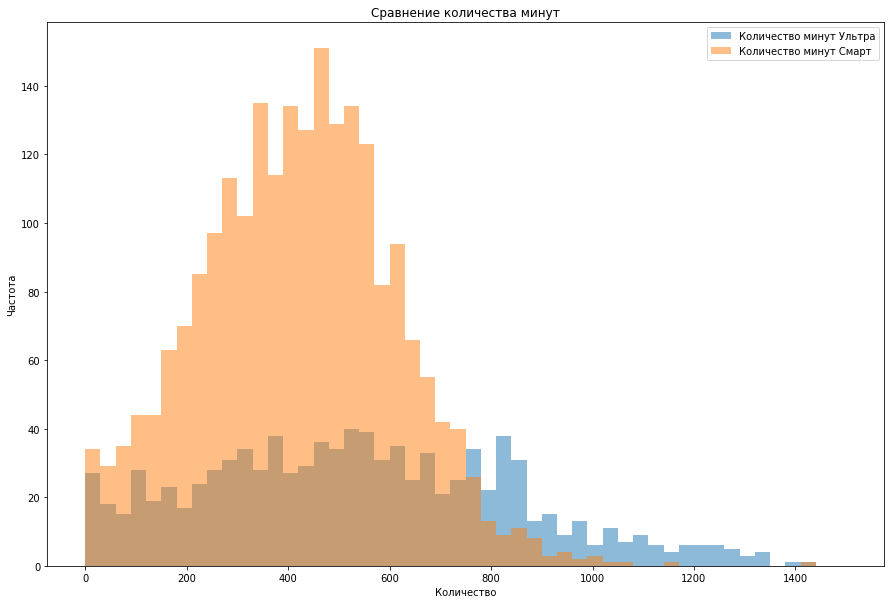

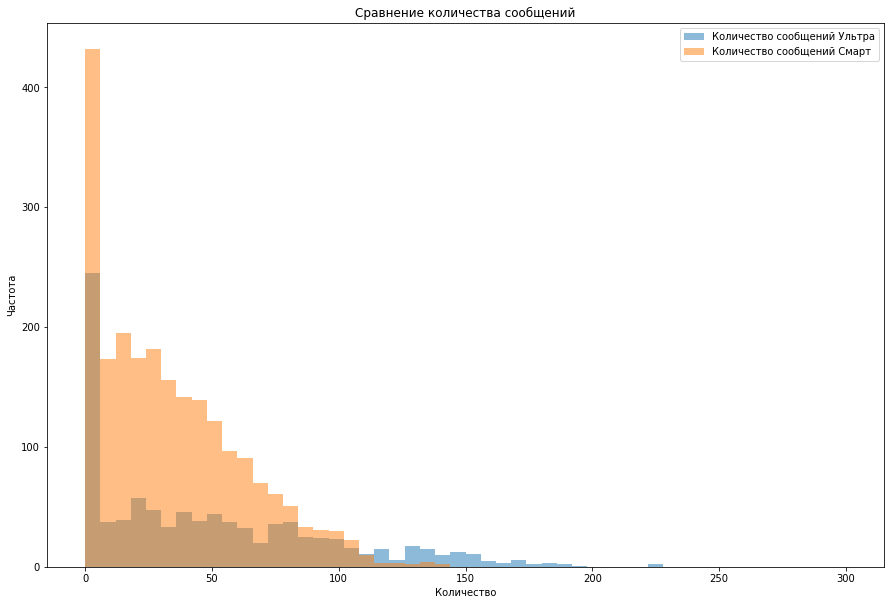

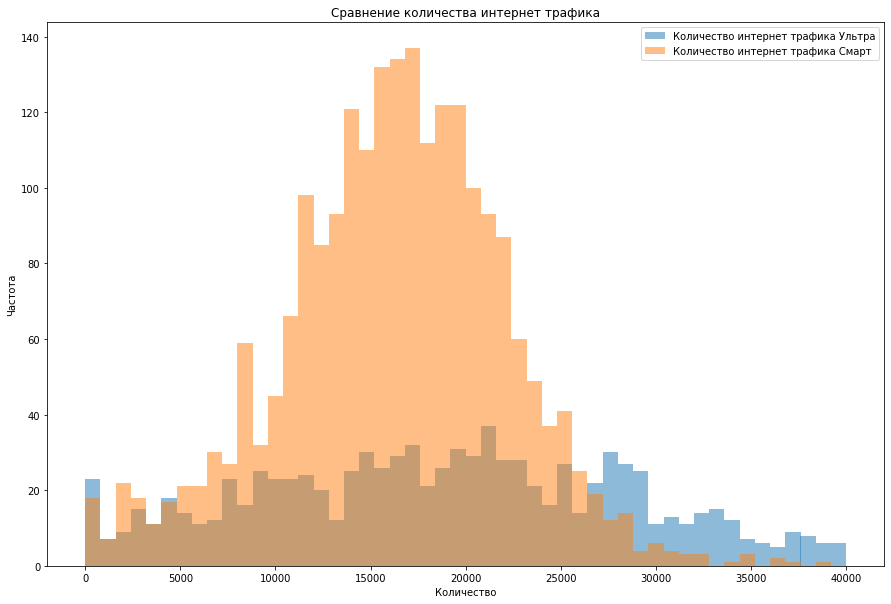

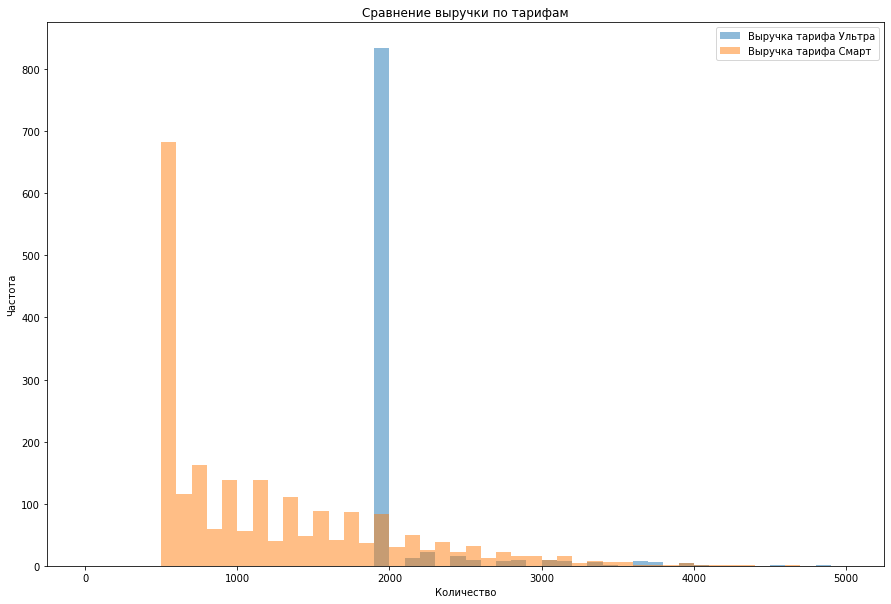

In [24]:
def my_hist(data1, data2, range1, range2, name, name1, name2):
    
    fig, ax = plt.subplots()
    
    ax.hist( data1,
              bins = 50,
              alpha = 0.5,
              range = (range1, range2),
              label = name1)
         
    
    ax.hist( data2,
              bins = 50,
              alpha = 0.5,
              range = (range1, range2),
              label = name2)
    
    ax.legend()
               
    fig.set_figheight(10)
    fig.set_figwidth(15)
            
    plt.title(name)
    plt.xlabel('Количество')
    plt.ylabel('Частота')
    
   
    plt.show()
    
my_hist(users_ultra['duration'],
        users_smart['duration'], 
        0, 1500, 'Сравнение количества минут',
        'Количество минут Ультра', 'Количество минут Смарт')

my_hist(users_ultra['sms_count'],
        users_smart['sms_count'], 
        0, 300, 'Сравнение количества сообщений',
        'Количество сообщений Ультра', 'Количество сообщений Смарт')

my_hist(users_ultra['mb_used'],
        users_smart['mb_used'], 
        0, 40000, 'Сравнение количества интернет трафика',
        'Количество интернет трафика Ультра', 'Количество интернет трафика Смарт')

my_hist(users_ultra['profit_month'],
        users_smart['profit_month'], 
        0, 5000, 'Сравнение выручки по тарифам',
        'Выручка тарифа Ультра', 'Выручка тарифа Смарт')

### Вывод:
<br>
Мы проанализировали данные, посчитали количество минут, сообщений и интернет трафика, а также для этих параметров среднее, дисперсию и стандартное отклонение для каждого тарифа. Построили гистограммы для того, чтобы оценить распределние случайных величин. Как видно из графиков, количество минут и  интернет - трафика имеют нормальное распределение, а количество сообщений имеет скошенность вправо.

В этом легко убедиться, если сравнить медиану и среднее для количества сообщений и интернет трафика, как видно из приведенных ниже данных, у количества сообщений медиана меньше, нежели . Это говорит о том, что распределение имеет скошенность вправо, а у количества интернета нормальное распределние, медиана и среднее примерно равны. Также стоит отметить, что пользователи тарифа "Ультра", тратят в среднем на 15 % больше минут, почти на 40 % больше сообщений и на 25% больше трафика.



In [25]:
print('Смарт')
print('Среднее количество минут в месяц:', users_smart['duration'].mean())
print('Медиана количества минут в месяц:', users_smart['duration'].median())
print('Среднее количество сообщений в месяц:', users_smart['sms_count'].mean())
print('Медиана количества сообщений в месяц:', users_smart['sms_count'].median())
print('Среднее количество интернет трафика в месяц:', users_smart['mb_used'].mean())
print('Медиана количества интернет трафика в месяц:', users_smart['mb_used'].median())      
print()
print('Ультра')
print('Среднее количество минут в месяц:', users_ultra['duration'].mean())
print('Медиана количества минут в месяц:', users_ultra['duration'].median())
print('Среднее количество сообщений в месяц:', users_ultra['sms_count'].mean())
print('Медиана количество сообщений в месяц:', users_ultra['sms_count'].median())
print('Среднее количество интернет трафика в месяц:', users_ultra['mb_used'].mean())
print('Медиана количества интернет трафика в месяц:', users_ultra['mb_used'].median())
print()

Смарт
Среднее количество минут в месяц: 418.68629213483143
Медиана количества минут в месяц: 422.0
Среднее количество сообщений в месяц: 33.36629213483146
Медиана количества сообщений в месяц: 28.0
Среднее количество интернет трафика в месяц: 16194.79611235955
Медиана количества интернет трафика в месяц: 16476.729999999996

Ультра
Среднее количество минут в месяц: 542.0313479623825
Медиана количества минут в месяц: 525.0
Среднее количество сообщений в месяц: 48.72622779519331
Медиана количество сообщений в месяц: 39.0
Среднее количество интернет трафика в месяц: 19340.434555903867
Медиана количества интернет трафика в месяц: 19300.03



## Проверка Гипотез
<br>
Проверим гипотезы оговоренные задании проекта. Нас будет интересовать:
1. Средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются.
2. Средняя выручка пользователей из Москвы отличается от пользователей других регионов

Для того, чтобы проверить гипотезы сначала сформируем для них нулевые гипотезы. 

1. Средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются. 

Нулевая гипотеза(H0) будет звучать так: "Средняя выручка тарифов "Ультра" и "Смарт" равны".
Альтернативная гипотеза (H1) будет звучать так: "Средняя выручка тарифов "Ультра" и "Смарт" не равны". 

2. Средняя выручка пользователей из Москвы отличается от пользователей других регионов

Нулевая гипотеза(H0) будет звучать так: "Средняя выручка пользователей из Москвы и пользователей других регионов равны".
Альтернативная гипотеза (H1) будет звучать так: "Средняя выручка пользователей из Москвы и пользователей других регионов".

Первую гипотезу будем проверять по выборкам разделенным по названию тарифа:


In [26]:

alpha = .05 #зададим общепринятый порог 

results = st.stats.ttest_ind(
    users_smart['profit_month'], 
    users_ultra['profit_month'], equal_var = False)

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.878368426323947e-295
Отвергаем нулевую гипотезу


Как видим, мы отвергаем нулевую гипотезу о том, что "Средняя выручка тарифов "Ультра" и "Смарт" равны", то есть есть смыл рассмотреть альтернативную гипотезу. Сказать однозначно, что мы подтвердили альтернативную гипотезу мы не можем, так как это общепринятое ограничение при проверке гипотез. 

Для проверки второй гипотезы также разделим наш датасет на две выборки - пользователей из Москвы и пользователей из других регионов:

In [27]:
users_moscow = users_final.query(
    'city == "москва"' )

users_over = users_final.query(
    'tariff != "москва"' )

alpha = .05 #зададим общепринятый порог 

results = st.stats.ttest_ind(
    users_moscow['profit_month'], 
    users_over['profit_month'], equal_var = False)

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.20885759534253825
Не получилось отвергнуть нулевую гипотезу


Вторую гипотезу отвергнуть у нас не получилось, поэтому ее можно рассматривать. Она звучит: "Средняя выручка пользователей из Москвы и пользователей других регионов равны".

### Вывод:

В данном пункте мы провели проверку двух гипотез. Сначала сформировали нулевые гипотезы, основанные на том, что средние значения двух независимых выборок примерно равны, затем сформировали альтернативные гипотезы. С помощь использования методов проверки гипотез, мы отвергли первую нулевую гипотезу, что "Средняя выручка тарифов "Ультра" и "Смарт" равны" и у нас не получилось отвергнуть вторую нулевую гипотезу -  "Средняя выручка пользователей из Москвы и пользователей других регионов равны". 

## общий вывод
<br>
Начнем подведение итогов, с того, что ответим на главный вопрос, какой же тариф лучше? Ультра или Смарт? Для этого посчитаем среднюю выручку по тарифам, благо что датасеты с значениями прибыли по месяцам для каждого тарифа у нас есть. 

Посчитаем среднюю выручку для двух тарифов: 

In [28]:
users_smart_profit_mean = users_smart[
    'profit_month'].mean().round().astype('int')

users_ultra_profit_mean = users_ultra[
    'profit_month'].mean().round().astype('int')

print('Средняя выручка для тарифа Смарт:', users_smart_profit_mean)
print('Средняя выручка для тарифа Ультра:', users_ultra_profit_mean)

if (users_smart_profit_mean < users_ultra_profit_mean): 
    print("Тариф Ультра приносит больше денег")
else:
    print("Тариф Смарт приносит больше денег")

Средняя выручка для тарифа Смарт: 1229
Средняя выручка для тарифа Ультра: 2060
Тариф Ультра приносит больше денег


Ну вот и главный ответ на поставленный в этом проекте вопрос - тариф Ультра приносит в среднем на 40 процентов больше денег, нежели тариф Смарт. Это отчетливо видно из средней выручке по тарифам. 

Теперь пройдемся по пунктам: 

1. Мы загрузили все исходные датасеты, подключили все необходимые бибилиотеки и предварительно просмотрели данные, выявили ошибки в типах данных, определели причины возникновения пропусков и необходимость их заполнения. 

2. Мы привели данные к нужным типам, нашли и исправили ошибки. Разобрались с причинами их возникновения. На основе данных сделали вывод о том, что заполнять пропуски в данных нет необходимости, так как это может исказить датасеты. 

Соеденили все таблицы в общий датасет, при этом как и многие коллеги не с первого раза все получилось, в итоге сгруппировали таблицу со звонками по идентификационному номеру пользователя и месяцу предоставления услуги. Затем присоеденили полученный датафрейм с таблицей пользователей и тарифами, после этого последовательно присоеденили таблицы сообщений и интернета. 

Посчитали для каждого пользователя количество израсходованных минут, сообщений и интернет-трафика. После проделанных операций вычислили помесячную выручку с каждого пользователя.

3. Мы описали поведение клиентов оператора, рассчитали сколько в среднем нужно пользователям каждого тарифа минут, сообщений и интнернет-трафика. Вычислили дисперсию и стандартное отклонения для каждой из величин. Построили гистограммы, из которых сделали вывод о характере их распределния, оценили раличия между тарифами. 

4. Мы проверили выдвинутые в задании гипотезы. Первая нулевая гипотеза "Средняя выручка тарифов "Ультра" и "Смарт" равны" была отвергнута. Вторую же нулевую гепотезу отвергнуть не получилось. 

5. Непосредственно выше в итоговом выводе мы ответили на главный вопрос проекта: 

**Тариф "Ультра" в среднем приносит на 40 % больше выручки нежели тариф "Смарт"**
